### Preprocessing

In [3]:
import re
import pandas as pd

raw_responses = pd.read_csv("final_human_llm_raw_responses.csv")

raw_responses 

# add a column called "rating"
# if "0 out of 3 hearts" in the "stimulus" column, set "rating" to 0
# if "1 out of 3 hearts" in the "stimulus" column, set "rating" to 1
# if "2 out of 3 hearts" in the "stimulus" column, set "rating" to 2
# if "3 out of 3 hearts" in the "stimulus" column, set "rating" to 3

def get_rating(stimulus):
    if "0 out of 3 hearts" in stimulus:
        return 0
    elif "1 out of 3 hearts" in stimulus:
        return 1
    elif "2 out of 3 hearts" in stimulus:
        return 2
    elif "3 out of 3 hearts" in stimulus:
        return 3
    else:
        return None
    
raw_responses["rating"] = raw_responses["stimulus"].apply(get_rating)

# add a column called "goal"
# if "If ? wanted to BOTH make ? feel good AND give accurate and informative feedback", set "goal" to "both" 
# if "If ? wanted to give as accurate and informative feedback as possible, but not necessarily make ? feel good", set "goal" to "informative"
# if "If ? wanted to make ? feel good, but not necessarily give informative feedback", set "goal" to "social"
# else, set "goal" to "default"
# "?" is a placeholder when doing the string matching

def get_goal(stimulus):
    if re.search(r"If .+ wanted to BOTH make .+ feel good AND give accurate and informative feedback", stimulus):
        return "both"
    elif re.search(r"If .+ wanted to give as accurate and informative feedback as possible, but not necessarily make .+ feel good", stimulus):
        return "informative"
    elif re.search(r"If .+ wanted to make .+ feel good, but not necessarily give informative feedback", stimulus):
        return "social"
    else:
        return "default"

raw_responses["goal"] = raw_responses["stimulus"].apply(get_goal)
    

# add a column called "llm_responses"
# for each row, values in the column "claude_responses", "gpt4o_responses", "llama3_responses" can be concatenated into a list as the value of the "llm_responses" column
# for each row, the value of the "llm_responses" column should be a list of strings

def get_llm_responses(row):
    llm_responses = []
    if row["claude_responses"] != "nan":
        llm_responses.append(row["claude_responses"])
    if row["gpt4o_responses"] != "nan":
        llm_responses.append(row["gpt4o_responses"])
    if row["llama3_responses"] != "nan":
        llm_responses.append(row["llama3_responses"])
    return llm_responses

raw_responses["llm_responses"] = raw_responses.apply(get_llm_responses, axis=1)


# make another column called "human_responses"
# for each row, values in the column "responses_1", "responses_2", "responses_3" can be concatenated into a list as the value of the "human_responses" column
# for each row, the value of the "human_responses" column should be a list of strings

def get_human_responses(row):
    human_responses = []
    if row["responses_1"] != "nan":
        human_responses.append(row["responses_1"])
    if row["responses_2"] != "nan":
        human_responses.append(row["responses_2"])
    if row["responses_3"] != "nan":
        human_responses.append(row["responses_3"])
    return human_responses

raw_responses["human_responses"] = raw_responses.apply(get_human_responses, axis=1)

# make another column called "responses"
# you just concat the lists of "llm_responses" and "human_responses" into a single list

def get_responses(row):
    responses = []
    if row["llm_responses"] != "nan":
        responses.extend(row["llm_responses"])
    if row["human_responses"] != "nan":
        responses.extend(row["human_responses"])
    return responses

raw_responses["responses"] = raw_responses.apply(get_responses, axis=1)

In [4]:
claude_responses = []
for index, row in raw_responses.iterrows():
    claude_responses.append(row["claude_responses"])

gpt4o_responses = []
for index, row in raw_responses.iterrows():
    gpt4o_responses.append(row["gpt4o_responses"])

llama3_responses = []
for index, row in raw_responses.iterrows():
    llama3_responses.append(row["llama3_responses"])

# concat all the items in the list into a single string
claude_responses = " ".join(claude_responses)
gpt4o_responses = " ".join(gpt4o_responses)
llama3_responses = " ".join(llama3_responses)

# 3 llms comparison
three_llm_responses = []
three_llm_responses.append(claude_responses)
three_llm_responses.append(gpt4o_responses)
three_llm_responses.append(llama3_responses)

In [5]:
# make all the rows of the "llm_responses" and "human_responses" columns into a list
human_responses = []
for index, row in raw_responses.iterrows():
    human_responses.append(row["human_responses"])

llm_responses = []
for index, row in raw_responses.iterrows():
    llm_responses.append(row["llm_responses"])



# flat the list
human_responses = [item for sublist in human_responses for item in sublist]
llm_responses = [item for sublist in llm_responses for item in sublist]



# concat all the items in the list into a single string
human_responses = " ".join(human_responses)
llm_responses = " ".join(llm_responses)

human_vs_llm_overall_comparison = []
human_vs_llm_overall_comparison.append(human_responses)
human_vs_llm_overall_comparison.append(llm_responses)




In [6]:
grouped_all_raw_responses_by_goal = raw_responses.groupby("goal").agg(
    all_raw_responses_list = ("responses", lambda x: [item for sublist in x.tolist() for item in sublist]),
).reset_index()

grouped_all_raw_responses_by_goal

,goal,all_raw_responses_list
0,both,"[While your presentation had potential, I noti..."
1,default,[I think there's a lot of room for improvement...
2,informative,[Your presentation had significant issues with...
3,social,"[You did a great job up there!, Your presentat..."


In [7]:
grouped_all_responses_by_goal = raw_responses.groupby("goal").agg(
    all_raw_responses_list = ("responses", lambda x: [item for sublist in x.tolist() for item in sublist]),
    claude_responses_list = ("claude_responses", lambda x: [item for item in x.tolist()]),
    gpt4o_responses_list = ("gpt4o_responses", lambda x: [item for item in x.tolist()]),
    llama3_responses_list = ("llama3_responses", lambda x: [item for item in x.tolist()]),
    LLM_responses_list = ("llm_responses", lambda x: [item for sublist in x.tolist() for item in sublist]),
    human_responses_list=("human_responses", lambda x: [item for sublist in x.tolist() for item in sublist])
).reset_index()

grouped_all_responses_by_goal

,goal,all_raw_responses_list,claude_responses_list,gpt4o_responses_list,llama3_responses_list,LLM_responses_list,human_responses_list
0,both,"[While your presentation had potential, I noti...","[While your presentation had potential, I noti...","[Your presentation had potential, but there ar...",[ I thought your presentation had some good po...,"[While your presentation had potential, I noti...","[It could use some work., Bob, let's go to a t..."
1,default,[I think there's a lot of room for improvement...,[I think there's a lot of room for improvement...,[Your presentation needs a lot of improvement....,[ I thought it could be improved in several ar...,[I think there's a lot of room for improvement...,"[It was terrible., The presentation wasn't goo..."
2,informative,[Your presentation had significant issues with...,[Your presentation had significant issues with...,[Your presentation wasn't good and needs signi...,[ I thought your presentation was pretty weak ...,[Your presentation had significant issues with...,[You could really work on your public speaking...
3,social,"[You did a great job up there!, Your presentat...","[You did a great job up there!, You did a nice...",[Your presentation was interesting and had som...,"[ I thought your presentation was very good., ...","[You did a great job up there!, Your presentat...","[It was not good., I thought your presentation..."


In [8]:
both_goal_all_responses_string = " ".join(grouped_all_responses_by_goal['all_raw_responses_list'].iloc[0])
default_goal_all_responses_string = " ".join(grouped_all_responses_by_goal['all_raw_responses_list'].iloc[1])
informative_goal_all_responses_string = " ".join(grouped_all_responses_by_goal['all_raw_responses_list'].iloc[2])
social_goal_all_responses_string = " ".join(grouped_all_responses_by_goal['all_raw_responses_list'].iloc[3])

all_raw_responses_comparison_by_goals_list = []
all_raw_responses_comparison_by_goals_list.append(both_goal_all_responses_string)
all_raw_responses_comparison_by_goals_list.append(default_goal_all_responses_string)
all_raw_responses_comparison_by_goals_list.append(informative_goal_all_responses_string)
all_raw_responses_comparison_by_goals_list.append(social_goal_all_responses_string)

all_raw_responses_comparison_by_goals_list

both_goal_human_responses_string = " ".join(grouped_all_responses_by_goal['human_responses_list'].iloc[0])
default_goal_human_responses_string = " ".join(grouped_all_responses_by_goal['human_responses_list'].iloc[1])
informative_goal_human_responses_string = " ".join(grouped_all_responses_by_goal['human_responses_list'].iloc[2])
social_goal_human_responses_string = " ".join(grouped_all_responses_by_goal['human_responses_list'].iloc[3])

both_goal_llm_responses_string = " ".join(grouped_all_responses_by_goal['LLM_responses_list'].iloc[0])
default_goal_llm_responses_string = " ".join(grouped_all_responses_by_goal['LLM_responses_list'].iloc[1])
informative_goal_llm_responses_string = " ".join(grouped_all_responses_by_goal['LLM_responses_list'].iloc[2])
social_goal_llm_responses_string = " ".join(grouped_all_responses_by_goal['LLM_responses_list'].iloc[3])

both_goal_human_vs_llm_responses_comparison_list = []
both_goal_human_vs_llm_responses_comparison_list.append(both_goal_human_responses_string)
both_goal_human_vs_llm_responses_comparison_list.append(both_goal_llm_responses_string)

default_goal_human_vs_llm_responses_comparison_list = []
default_goal_human_vs_llm_responses_comparison_list.append(default_goal_human_responses_string)
default_goal_human_vs_llm_responses_comparison_list.append(default_goal_llm_responses_string)

informative_goal_human_vs_llm_responses_comparison_list = []
informative_goal_human_vs_llm_responses_comparison_list.append(informative_goal_human_responses_string)
informative_goal_human_vs_llm_responses_comparison_list.append(informative_goal_llm_responses_string)

social_goal_human_vs_llm_responses_comparison_list = []
social_goal_human_vs_llm_responses_comparison_list.append(social_goal_human_responses_string)
social_goal_human_vs_llm_responses_comparison_list.append(social_goal_llm_responses_string)


all_human_responses_comparison_by_goals_list = []
all_human_responses_comparison_by_goals_list.append(both_goal_human_responses_string)
all_human_responses_comparison_by_goals_list.append(default_goal_human_responses_string)
all_human_responses_comparison_by_goals_list.append(informative_goal_human_responses_string)
all_human_responses_comparison_by_goals_list.append(social_goal_human_responses_string)

all_llm_responses_comparison_by_goals_list = []
all_llm_responses_comparison_by_goals_list.append(both_goal_llm_responses_string)
all_llm_responses_comparison_by_goals_list.append(default_goal_llm_responses_string)
all_llm_responses_comparison_by_goals_list.append(informative_goal_llm_responses_string)
all_llm_responses_comparison_by_goals_list.append(social_goal_llm_responses_string)



In [9]:
grouped_LLM_human_responses_separately_by_goal = raw_responses.groupby("goal").agg(
    LLM_responses_list = ("llm_responses", lambda x: [item for sublist in x.tolist() for item in sublist]),
    human_responses_list=("human_responses", lambda x: [item for sublist in x.tolist() for item in sublist])
).reset_index()

In [10]:
both_goal_LLM_responses_string = " ".join(grouped_all_responses_by_goal['LLM_responses_list'].iloc[0])
default_goal_LLM_responses_string = " ".join(grouped_all_responses_by_goal['LLM_responses_list'].iloc[1])
informative_goal_LLM_responses_string = " ".join(grouped_all_responses_by_goal['LLM_responses_list'].iloc[2])
social_goal_LLM_responses_string = " ".join(grouped_all_responses_by_goal['LLM_responses_list'].iloc[3])

all_LLM_responses_comparison_by_goals_list = []
all_LLM_responses_comparison_by_goals_list.append(both_goal_LLM_responses_string)
all_LLM_responses_comparison_by_goals_list.append(default_goal_LLM_responses_string)
all_LLM_responses_comparison_by_goals_list.append(informative_goal_LLM_responses_string)
all_LLM_responses_comparison_by_goals_list.append(social_goal_LLM_responses_string)

both_goal_human_responses_string = " ".join(grouped_all_responses_by_goal['human_responses_list'].iloc[0])
default_goal_human_responses_string = " ".join(grouped_all_responses_by_goal['human_responses_list'].iloc[1])
informative_goal_human_responses_string = " ".join(grouped_all_responses_by_goal['human_responses_list'].iloc[2])
social_goal_human_responses_string = " ".join(grouped_all_responses_by_goal['human_responses_list'].iloc[3])

all_human_responses_comparison_by_goals_list = []
all_human_responses_comparison_by_goals_list.append(both_goal_human_responses_string)
all_human_responses_comparison_by_goals_list.append(default_goal_human_responses_string)
all_human_responses_comparison_by_goals_list.append(informative_goal_human_responses_string)
all_human_responses_comparison_by_goals_list.append(social_goal_human_responses_string)

all_LLM_human_responses_both_goal_list = []
all_LLM_human_responses_both_goal_list.append(both_goal_LLM_responses_string)
all_LLM_human_responses_both_goal_list.append(both_goal_human_responses_string)

all_LLM_human_responses_default_goal_list = []
all_LLM_human_responses_default_goal_list.append(default_goal_LLM_responses_string)
all_LLM_human_responses_default_goal_list.append(default_goal_human_responses_string)

all_LLM_human_responses_informative_goal_list = []
all_LLM_human_responses_informative_goal_list.append(informative_goal_LLM_responses_string)
all_LLM_human_responses_informative_goal_list.append(informative_goal_human_responses_string)

all_LLM_human_responses_social_goal_list = []
all_LLM_human_responses_social_goal_list.append(social_goal_LLM_responses_string)
all_LLM_human_responses_social_goal_list.append(social_goal_human_responses_string)


In [11]:
human_responses = pd.read_csv("human_evaluation_data_cleaned_final_version.csv")

In [12]:
# there is column in human_responses called preferred_response, you should get all the values from this column and turn it into a list
preferred_response_list = human_responses["preferred_response"].tolist()
preferred_response_list = [x.strip() for x in preferred_response_list]
# merge the whole preferred_response_list into a single string
preferred_response_string = " ".join(preferred_response_list)

non_preferred_response_list = human_responses["non_preferred_response"].tolist()
non_preferred_response_list = [x.strip() for x in non_preferred_response_list]
# merge the non-preferred_response_list into a single string
non_preferred_response_string = " ".join(non_preferred_response_list)

preferred_nonpreferred_responses_list = []
preferred_nonpreferred_responses_list.append(preferred_response_string)
preferred_nonpreferred_responses_list.append(non_preferred_response_string)

In [13]:
# group the rows by the "rating" column, and for each group get the preferred and non-preferred responses list
# there are 4 ratings: 0 out of 3 hearts, 1 out of 3 hearts, 2 out of 3 hearts, and 3 out of 3 hearts; you should give the number of hearts as the name of the group

# for each group, get the preferred and non-preferred responses list
grouped_responses_by_rating = human_responses.groupby("rating").agg(
    preferred_response_list=("preferred_response", lambda x: x.tolist()),
    non_preferred_response_list=("non_preferred_response", lambda x: x.tolist()),
).reset_index()

# do the group by "goal" column, and for each group get the preferred and non-preferred responses list

grouped_responses_by_goal = human_responses.groupby("goal").agg(
    preferred_response_list=("preferred_response", lambda x: x.tolist()),
    non_preferred_response_list=("non_preferred_response", lambda x: x.tolist()),
).reset_index()

In [14]:
preferred_response_list_by_rating_0_hearts = grouped_responses_by_rating["preferred_response_list"].iloc[0]
preferred_response_list_by_rating_1_hearts = grouped_responses_by_rating["preferred_response_list"].iloc[1]
preferred_response_list_by_rating_2_hearts = grouped_responses_by_rating["preferred_response_list"].iloc[2]
preferred_response_list_by_rating_3_hearts = grouped_responses_by_rating["preferred_response_list"].iloc[3]

non_preferred_response_list_by_rating_0_hearts = grouped_responses_by_rating["non_preferred_response_list"].iloc[0]
non_preferred_response_list_by_rating_1_hearts = grouped_responses_by_rating["non_preferred_response_list"].iloc[1]
non_preferred_response_list_by_rating_2_hearts = grouped_responses_by_rating["non_preferred_response_list"].iloc[2]
non_preferred_response_list_by_rating_3_hearts = grouped_responses_by_rating["non_preferred_response_list"].iloc[3]

# get the preferred and non-preferred responses list for each goal
preferred_response_list_by_goal_both = grouped_responses_by_goal["preferred_response_list"].iloc[0]
preferred_response_list_by_goal_default = grouped_responses_by_goal["preferred_response_list"].iloc[1]
preferred_response_list_by_goal_informative = grouped_responses_by_goal["preferred_response_list"].iloc[2]
preferred_response_list_by_goal_social = grouped_responses_by_goal["preferred_response_list"].iloc[3]

non_preferred_response_list_by_goal_both = grouped_responses_by_goal["non_preferred_response_list"].iloc[0]
non_preferred_response_list_by_goal_default = grouped_responses_by_goal["non_preferred_response_list"].iloc[1]
non_preferred_response_list_by_goal_informative = grouped_responses_by_goal["non_preferred_response_list"].iloc[2]
non_preferred_response_list_by_goal_social = grouped_responses_by_goal["non_preferred_response_list"].iloc[3]

In [15]:
# specifically consider for the label "human_vs_LLM" in the "label" column, and a preferred response list and a non-preferred response list

human_vs_LLM_preferred_response_list = human_responses[human_responses["label"] == "human_vs_LLM"]["preferred_response"].tolist()
human_vs_LLM_preferred_response_list = [x.strip() for x in human_vs_LLM_preferred_response_list]
human_vs_LLM_preferred_response_string = " ".join(human_vs_LLM_preferred_response_list)

human_vs_LLM_non_preferred_response_list = human_responses[human_responses["label"] == "human_vs_LLM"]["non_preferred_response"].tolist()
human_vs_LLM_non_preferred_response_list = [x.strip() for x in human_vs_LLM_non_preferred_response_list]
human_vs_LLM_non_preferred_response_string = " ".join(human_vs_LLM_non_preferred_response_list)

human_vs_LLM_preferred_nonpreferred_responses_list = []
human_vs_LLM_preferred_nonpreferred_responses_list.append(human_vs_LLM_preferred_response_string)
human_vs_LLM_preferred_nonpreferred_responses_list.append(human_vs_LLM_non_preferred_response_string)


# do the grouping by "rating" and "goal" thing with label "human_vs_LLM"
grouped_responses_by_rating_human_vs_LLM = human_responses[human_responses["label"] == "human_vs_LLM"].groupby("rating").agg(
    preferred_response_list=("preferred_response", lambda x: x.tolist()),
    non_preferred_response_list=("non_preferred_response", lambda x: x.tolist()),
).reset_index()

grouped_responses_by_goal_human_vs_LLM = human_responses[human_responses["label"] == "human_vs_LLM"].groupby("goal").agg(
    preferred_response_list=("preferred_response", lambda x: x.tolist()),
    non_preferred_response_list=("non_preferred_response", lambda x: x.tolist()),
).reset_index()

grouped_responses_by_rating_human_vs_LLM
grouped_responses_by_goal_human_vs_LLM

# get the preferred and non-preferred responses list for each rating
preferred_response_list_by_rating_0_hearts_human_vs_LLM = grouped_responses_by_rating_human_vs_LLM["preferred_response_list"].iloc[0]
preferred_response_list_by_rating_1_hearts_human_vs_LLM = grouped_responses_by_rating_human_vs_LLM["preferred_response_list"].iloc[1]
preferred_response_list_by_rating_2_hearts_human_vs_LLM = grouped_responses_by_rating_human_vs_LLM["preferred_response_list"].iloc[2]
preferred_response_list_by_rating_3_hearts_human_vs_LLM = grouped_responses_by_rating_human_vs_LLM["preferred_response_list"].iloc[3]

non_preferred_response_list_by_rating_0_hearts_human_vs_LLM = grouped_responses_by_rating_human_vs_LLM["non_preferred_response_list"].iloc[0]
non_preferred_response_list_by_rating_1_hearts_human_vs_LLM = grouped_responses_by_rating_human_vs_LLM["non_preferred_response_list"].iloc[1]
non_preferred_response_list_by_rating_2_hearts_human_vs_LLM = grouped_responses_by_rating_human_vs_LLM["non_preferred_response_list"].iloc[2]
non_preferred_response_list_by_rating_3_hearts_human_vs_LLM = grouped_responses_by_rating_human_vs_LLM["non_preferred_response_list"].iloc[3]

# get the preferred and non-preferred responses list for each goal
preferred_response_list_by_goal_both_human_vs_LLM = grouped_responses_by_goal_human_vs_LLM["preferred_response_list"].iloc[0]
preferred_response_list_by_goal_default_human_vs_LLM = grouped_responses_by_goal_human_vs_LLM["preferred_response_list"].iloc[1]
preferred_response_list_by_goal_informative_human_vs_LLM = grouped_responses_by_goal_human_vs_LLM["preferred_response_list"].iloc[2]
preferred_response_list_by_goal_social_human_vs_LLM = grouped_responses_by_goal_human_vs_LLM["preferred_response_list"].iloc[3]

non_preferred_response_list_by_goal_both_human_vs_LLM = grouped_responses_by_goal_human_vs_LLM["non_preferred_response_list"].iloc[0]
non_preferred_response_list_by_goal_default_human_vs_LLM = grouped_responses_by_goal_human_vs_LLM["non_preferred_response_list"].iloc[1]
non_preferred_response_list_by_goal_informative_human_vs_LLM = grouped_responses_by_goal_human_vs_LLM["non_preferred_response_list"].iloc[2]
non_preferred_response_list_by_goal_social_human_vs_LLM = grouped_responses_by_goal_human_vs_LLM["non_preferred_response_list"].iloc[3]

#### dimensions for comparison


* preferred vs. non-preferred overall comparison
* human vs. LLM overall comparison
* preferred vs. non-preferred human_LLM comparison
* three different LLMs responses comparison
* four different goals comparison
    * all raw responses 4 different goals comparison
    * LLM responses only 4 goals comparison
    * human responses only 4 goals comparison
* four different ratings comparison (optional)


- for preferred vs. non-preferred
    - do the more detailed comparison across goals
- for human vs. LLM overall comparison
    - also do the comparison across goals
- for preferred vs. non-preferred human_LLM comparison
    - do the comparison across goals
- for three different LLMs responses comparison
    - also do the comparison across goals

### PMI

for pmi, do the unigram probabilities.

note that the docs are 'balanced,' so for p(word, doc) / p(word) * p(doc) we have p(doc) = 1/2. so this reduces to  
p(word, doc) / p(word) p(doc) = p(word | doc) p(doc) / p(word) p(doc)   
                              = p(word | doc) / p(word)     
which reduces to    
frequency of word in doc 1 / overall frequency of word

The PMI formula in your context is:     
PMI(word, doc) = log(p(word | doc) / p(word))   
Which can be expressed in terms of frequencies as:      
PMI(word, doc) = log((frequency of word in doc / total words in doc) / (total frequency of word across all docs / total  words across all docs))    
This can be further simplified if we assume the documents are of equal length. In that case, the formula becomes:   
PMI(word, doc) = log(frequency of word in doc / overall frequency of word)  

In [21]:
import math
import numpy as np
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK resources (run once)
# nltk.download('punkt')
# nltk.download('stopwords')

def calculate_pmi(documents,  alpha=2,
                 remove_stopwords=False, language='english'):
    """
    Calculate PMI scores for words in each document of a balanced corpus with advanced smoothing.
    
    Args:
        documents: List of document strings
        smoothing: Smoothing method ('additive', 'jelinek_mercer', 'dirichlet', 'absolute_discount')
        alpha: Parameter for Dirichlet and additive smoothing
        lambda_param: Parameter for Jelinek-Mercer smoothing
        remove_stopwords: Boolean indicating whether to remove stopwords
        language: Language for stopwords (default: 'english')
    
    Returns:
        List of dictionaries with PMI scores for each word in each document
    """
    # Get stopwords if needed
    stop_words = set()
    if remove_stopwords:
        stop_words = set(stopwords.words(language))
    
    # Step 1: Tokenize documents using NLTK
    doc_tokens = []
    for doc in documents:
        # Tokenize with NLTK
        tokens = word_tokenize(doc.lower())

        # Remove non-alphabetic tokens, keep digits
        tokens = [token for token in tokens if token.isalpha() or token.isdigit()]
        
        # Remove stopwords if requested
        if remove_stopwords:
            tokens = [token for token in tokens if token not in stop_words]
            
        doc_tokens.append(tokens)
    
    # Get all unique words in the corpus
    all_unique_words = set()
    for tokens in doc_tokens:
        all_unique_words.update(tokens)
    vocabulary_size = len(all_unique_words)
    
    # Step 2: Count words in each document (without smoothing yet)
    raw_doc_word_counts = []
    for tokens in doc_tokens:
        counter = Counter(tokens)
        raw_doc_word_counts.append(counter)
    
    # Step 3: Count words across all documents (global counts)
    all_words_raw = Counter()
    for tokens in doc_tokens:
        all_words_raw.update(tokens)
    
    # Step 4: Calculate document lengths and total words
    length_doc_list = len(doc_tokens)
    doc_lengths_raw = [sum(counts.values()) for counts in raw_doc_word_counts]
    total_words_raw = sum(doc_lengths_raw)
    
    # Step 5: Calculate smoothed probabilities based on chosen method
    doc_word_probs = []
    
    for doc_idx, doc_counts in enumerate(raw_doc_word_counts):
        doc_probs = {}
        doc_length = doc_lengths_raw[doc_idx]
        
        for word in all_unique_words:
            # Raw counts (0 if not in document)
            count_in_doc = doc_counts.get(word, 0)
        
            p_word_given_doc = (count_in_doc + alpha) / (doc_length + alpha * vocabulary_size)
            
            doc_probs[word] = p_word_given_doc
            
        doc_word_probs.append(doc_probs)
    
    # Step 6: Calculate global probabilities with the same smoothing
    global_word_probs = {}
    
    for word in all_unique_words:
        count_in_corpus = all_words_raw.get(word, 0)
        
        p_word = (count_in_corpus + alpha * length_doc_list) / (total_words_raw + alpha * vocabulary_size * length_doc_list)
            
        global_word_probs[word] = p_word
    
    # Step 7: Calculate PMI for each word in each document
    pmi_scores = []
    
    for doc_idx, doc_probs in enumerate(doc_word_probs):
        doc_pmi = {}
        for word in all_unique_words:
            # Get smoothed probabilities
            p_word_given_doc = doc_probs[word]
            p_word = global_word_probs[word]
            
            # Calculate PMI
            pmi = math.log2(p_word_given_doc / p_word)
            doc_pmi[word] = pmi
        
        pmi_scores.append(doc_pmi)
    
    return pmi_scores

In [22]:
# Function to display results
def display_pmi_results(documents, pmi_results, title):
    print(f"\n{title}")
    print("=" * 50)
    
    for i, doc_pmi in enumerate(pmi_results):
        print(f"Document {i+1}")
        
        # Sort words by PMI score (highest first)
        sorted_words = sorted(doc_pmi.items(), key=lambda x: x[1], reverse=True)
        
        print("Word\tPMI")
        print("-" * 20)
        for index, (word, score) in enumerate(sorted_words[:20]):  # Show top 5 words
            print(f"Rank [{index+1}]: {word}\t{score:.4f}")
        
        print("\n" + "-" * 50)


print("\n\n--- human_vs_llm_overall_comparison PMI Results (doc 1 is human responses, doc 2 is LLM responses) ---")
pmi_results_without_stopwords_human_vs_llm_overall_comparison = calculate_pmi(human_vs_llm_overall_comparison, remove_stopwords=True)
display_pmi_results(human_vs_llm_overall_comparison, pmi_results_without_stopwords_human_vs_llm_overall_comparison, "PMI Results (Without Stopwords)")

print("\n\n--- all_raw_responses_comparison_by_goals_list PMI Results (doc 1 is both, doc 2 is default, doc 3 is informative, doc 4 is social) ---")
pmi_results_without_stopwords_all_raw_responses_comparison_by_goals_list = calculate_pmi(all_raw_responses_comparison_by_goals_list, remove_stopwords=True)
display_pmi_results(all_raw_responses_comparison_by_goals_list, pmi_results_without_stopwords_all_raw_responses_comparison_by_goals_list, "PMI Results (Without Stopwords)")

print("\n\n--- all_human_responses_comparison_by_goals_list PMI Results (doc 1 is both, doc 2 is default, doc 3 is informative, doc 4 is social) ---")
pmi_results_without_stopwords_all_human_responses_comparison_by_goals_list = calculate_pmi(all_human_responses_comparison_by_goals_list, remove_stopwords=True)
display_pmi_results(all_human_responses_comparison_by_goals_list, pmi_results_without_stopwords_all_human_responses_comparison_by_goals_list, "PMI Results (Without Stopwords)")

print("\n\n--- all_llm_responses_comparison_by_goals_list PMI Results (doc 1 is both, doc 2 is default, doc 3 is informative, doc 4 is social) ---")
pmi_results_without_stopwords_all_llm_responses_comparison_by_goals_list = calculate_pmi(all_llm_responses_comparison_by_goals_list, remove_stopwords=True)
display_pmi_results(all_llm_responses_comparison_by_goals_list, pmi_results_without_stopwords_all_llm_responses_comparison_by_goals_list, "PMI Results (Without Stopwords)")

print("\n\n---both_goal_human_vs_llm_responses_comparison PMI Results (doc 1 is human responses, doc 2 is LLM responses) ---")
pmi_results_without_stopwords_both_goal_human_vs_llm_responses_comparison_list = calculate_pmi(both_goal_human_vs_llm_responses_comparison_list, remove_stopwords=True)
display_pmi_results(both_goal_human_vs_llm_responses_comparison_list, pmi_results_without_stopwords_both_goal_human_vs_llm_responses_comparison_list, "PMI Results (Without Stopwords)")

print("\n\n--- default_goal_human_vs_llm_responses_comparison PMI Results (doc 1 is human responses, doc 2 is LLM responses) ---")
pmi_results_without_stopwords_default_goal_human_vs_llm_responses_comparison_list = calculate_pmi(default_goal_human_vs_llm_responses_comparison_list, remove_stopwords=True)
display_pmi_results(default_goal_human_vs_llm_responses_comparison_list, pmi_results_without_stopwords_default_goal_human_vs_llm_responses_comparison_list, "PMI Results (Without Stopwords)")

print("\n\n--- informative_goal_human_vs_llm_responses_comparison PMI Results (doc 1 is human responses, doc 2 is LLM responses) ---")
pmi_results_without_stopwords_informative_goal_human_vs_llm_responses_comparison_list = calculate_pmi(informative_goal_human_vs_llm_responses_comparison_list, remove_stopwords=True)
display_pmi_results(informative_goal_human_vs_llm_responses_comparison_list, pmi_results_without_stopwords_informative_goal_human_vs_llm_responses_comparison_list, "PMI Results (Without Stopwords)")

print("\n\n--- social_goal_human_vs_llm_responses_comparison PMI Results (doc 1 is human responses, doc 2 is LLM responses) ---")
pmi_results_without_stopwords_social_goal_human_vs_llm_responses_comparison_list = calculate_pmi(social_goal_human_vs_llm_responses_comparison_list, remove_stopwords=True)

print("\n\n--- preferred vs. non-preferred responses PMI Results (doc 1 is preferred responses, doc 2 is non-preferred responses) ---")
pmi_results_without_stopwords_preferred_nonpreferred_responses_list = calculate_pmi(preferred_nonpreferred_responses_list, remove_stopwords=True)
display_pmi_results(preferred_nonpreferred_responses_list, pmi_results_without_stopwords_preferred_nonpreferred_responses_list, "PMI Results (Without Stopwords)")

print("\n\n--- human_vs_LLM_preferred_nonpreferred_responses_list PMI Results (doc 1 is preferred responses, doc 2 is non-preferred responses) ---")
pmi_results_without_stopwords_human_vs_LLM_preferred_nonpreferred_responses_list = calculate_pmi(human_vs_LLM_preferred_nonpreferred_responses_list, remove_stopwords=True)
display_pmi_results(human_vs_LLM_preferred_nonpreferred_responses_list, pmi_results_without_stopwords_human_vs_LLM_preferred_nonpreferred_responses_list, "PMI Results (Without Stopwords)")



--- human_vs_llm_overall_comparison PMI Results (doc 1 is human responses, doc 2 is LLM responses) ---

PMI Results (Without Stopwords)
Document 1
Word	PMI
--------------------
Rank [1]: best	0.9104
Rank [2]: bad	0.9020
Rank [3]: feel	0.8925
Rank [4]: time	0.8698
Rank [5]: know	0.8698
Rank [6]: give	0.8698
Rank [7]: tried	0.8400
Rank [8]: one	0.8214
Rank [9]: try	0.8145
Rank [10]: thing	0.7994
Rank [11]: however	0.7994
Rank [12]: part	0.7729
Rank [13]: awesome	0.7729
Rank [14]: wow	0.7729
Rank [15]: show	0.7729
Rank [16]: practicing	0.7729
Rank [17]: hear	0.7729
Rank [18]: feedback	0.7405
Rank [19]: change	0.7405
Rank [20]: read	0.7405

--------------------------------------------------
Document 2
Word	PMI
--------------------
Rank [1]: significant	0.8714
Rank [2]: moments	0.8199
Rank [3]: shows	0.7882
Rank [4]: rhythm	0.7882
Rank [5]: expression	0.7797
Rank [6]: absolutely	0.7633
Rank [7]: technique	0.7537
Rank [8]: areas	0.7139
Rank [9]: delivery	0.7057
Rank [10]: quite	0.6991
Rank

In [ ]:
# do the divergence analysis between groups


### Divergence Analysis

In [16]:
import math
import random
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.spatial.distance import jensenshannon

def normalize_dict(word_dict):
    """Convert word counts to probabilities (normalize to sum to 1)"""
    total = sum(word_dict.values())
    return {word: count/total for word, count in word_dict.items()}

def dict_to_probability_vector(word_dict, all_words):
    """Convert dictionary to probability vector with consistent word ordering"""
    prob_dict = normalize_dict(word_dict)
    return np.array([prob_dict.get(word, 0.000001) for word in all_words])

def jensen_shannon_divergence(dict1, dict2):
    """Calculate Jensen-Shannon divergence between two word frequency dictionaries"""
    # Get all unique words from both dictionaries
    all_words = sorted(set(dict1.keys()) | set(dict2.keys()))
    
    # Convert to probability vectors
    p1 = dict_to_probability_vector(dict1, all_words)
    p2 = dict_to_probability_vector(dict2, all_words)
    
    # Calculate JSD (scipy's jensenshannon returns the square root of JSD)
    # We square it to get the actual JSD
    jsd = jensenshannon(p1, p2) ** 2
    
    return jsd


def create_null_distribution(dict1, dict2, n_permutations=1000, method='shuffle'):
    """
    Create null distribution by randomly shuffling word assignments
    while preserving total counts
    
    Parameters:
    - method: 'shuffle' (shuffles individual tokens) or 'resample' (resamples from combined pool)
    """
    if method == 'shuffle':
        # Original method: shuffle individual tokens
        # Combine all words and their total counts
        combined_dict = defaultdict(int)
        for word, count in dict1.items():
            combined_dict[word] += count
        for word, count in dict2.items():
            combined_dict[word] += count
        
        # Get total counts for each dictionary
        total1 = sum(dict1.values())
        total2 = sum(dict2.values())
        
        null_jsds = []
        
        for _ in range(n_permutations):
            # Create a list of all word tokens
            all_tokens = []
            for word, count in combined_dict.items():
                all_tokens.extend([word] * count)
            
            # Randomly shuffle all tokens
            random.shuffle(all_tokens)
            
            # Split randomly into two groups matching original sizes
            shuffled_dict1 = defaultdict(int)
            shuffled_dict2 = defaultdict(int)
            
            for i, word in enumerate(all_tokens):
                if i < total1:
                    shuffled_dict1[word] += 1
                else:
                    shuffled_dict2[word] += 1
            
            # Calculate JSD for this permutation
            jsd = jensen_shannon_divergence(shuffled_dict1, shuffled_dict2)
            null_jsds.append(jsd)
    
    elif method == 'resample':
        # Alternative method: resample from combined probability distribution
        # Combine dictionaries to get overall word probabilities
        combined_dict = defaultdict(int)
        for word, count in dict1.items():
            combined_dict[word] += count
        for word, count in dict2.items():
            combined_dict[word] += count
        
        # Convert to probabilities
        total_combined = sum(combined_dict.values())
        words = list(combined_dict.keys())
        probs = [combined_dict[word] / total_combined for word in words]
        
        # Get original total counts
        total1 = sum(dict1.values())
        total2 = sum(dict2.values())
        
        null_jsds = []
        
        for _ in range(n_permutations):
            # Resample words for each dictionary
            sample1 = np.random.choice(words, size=total1, p=probs)
            sample2 = np.random.choice(words, size=total2, p=probs)
            
            # Count frequencies
            resampled_dict1 = defaultdict(int)
            resampled_dict2 = defaultdict(int)
            
            for word in sample1:
                resampled_dict1[word] += 1
            for word in sample2:
                resampled_dict2[word] += 1
            
            # Calculate JSD for this permutation
            jsd = jensen_shannon_divergence(resampled_dict1, resampled_dict2)
            null_jsds.append(jsd)
    
    else:
        raise ValueError("method must be 'shuffle' or 'resample'")
    
    return null_jsds

def calculate_p_value(observed_jsd, null_distribution):
    """Calculate p-value based on null distribution"""
    # Count how many null values are greater than or equal to observed
    greater_or_equal = sum(1 for null_jsd in null_distribution if null_jsd >= observed_jsd)
    p_value = greater_or_equal / len(null_distribution)
    return p_value

def compare_word_distributions(dict1, dict2, n_permutations=1000, null_method='shuffle'):
    """
    Complete analysis comparing two word frequency dictionaries
    
    Parameters:
    - dict1, dict2: dictionaries with word frequencies
    - n_permutations: number of permutations for null distribution
    - null_method: 'shuffle' (default) or 'resample' for different null models
    """
    # Calculate observed JSD
    observed_jsd = jensen_shannon_divergence(dict1, dict2)
    
    # Generate null distribution
    null_distribution = create_null_distribution(dict1, dict2, n_permutations, method=null_method)
    
    # Calculate p-value
    p_value = calculate_p_value(observed_jsd, null_distribution)
    
    # Calculate statistics
    null_mean = np.mean(null_distribution)
    null_std = np.std(null_distribution)
    null_percentiles = np.percentile(null_distribution, [5, 25, 50, 75, 95])
    
    results = {
        'observed_jsd': observed_jsd,
        'p_value': p_value,
        'null_mean': null_mean,
        'null_std': null_std,
        'null_percentiles': {
            '5%': null_percentiles[0],
            '25%': null_percentiles[1],
            '50%': null_percentiles[2],
            '75%': null_percentiles[3],
            '95%': null_percentiles[4]
        },
        'null_distribution': null_distribution
    }
    
    return results

def visualize_results(results, title="JSD Analysis Results"):
    """Create visualization of null distribution and observed JSD"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot 1: Histogram of null distribution
    ax1.hist(results['null_distribution'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
    ax1.axvline(results['observed_jsd'], color='red', linestyle='--', linewidth=2, label=f'Observed JSD: {results["observed_jsd"]:.4f}')
    ax1.axvline(results['null_mean'], color='green', linestyle='-', linewidth=2, label=f'Null Mean: {results["null_mean"]:.4f}')
    ax1.set_xlabel('Jensen-Shannon Divergence')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Null Distribution of JSD')
    ax1.legend()
    
    # Plot 2: Box plot comparison
    box_data = [results['null_distribution'], [results['observed_jsd']]]
    ax2.boxplot(box_data, tick_labels=['Null Distribution', 'Observed'])
    ax2.set_ylabel('Jensen-Shannon Divergence')
    ax2.set_title('JSD Comparison')
    
    plt.suptitle(f'{title}\np-value: {results["p_value"]:.6f}', fontsize=14)
    plt.tight_layout()
    plt.show()

def analyze_your_data(dict1, dict2, null_method='shuffle'):    
    results = compare_word_distributions(dict1, dict2, n_permutations=1000, null_method=null_method)
    visualize_results(results)
    print(f"\nDictionary 1 Summary:")
    print(f"  Total words: {sum(dict1.values())}")
    print(f"  Unique words: {len(dict1)}")
    print(f"  Most frequent: {max(dict1.items(), key=lambda x: x[1])}")
    
    print(f"\nDictionary 2 Summary:")
    print(f"  Total words: {sum(dict2.values())}")
    print(f"  Unique words: {len(dict2)}")
    print(f"  Most frequent: {max(dict2.items(), key=lambda x: x[1])}")
    
    print(f"\nStatistical Analysis:")
    print(f"  Observed JSD: {results['observed_jsd']:.6f}")
    print(f"  P-value: {results['p_value']:.6f}")
    print(f"  Null distribution mean: {results['null_mean']:.6f}")
    print(f"  Null distribution std: {results['null_std']:.6f}")

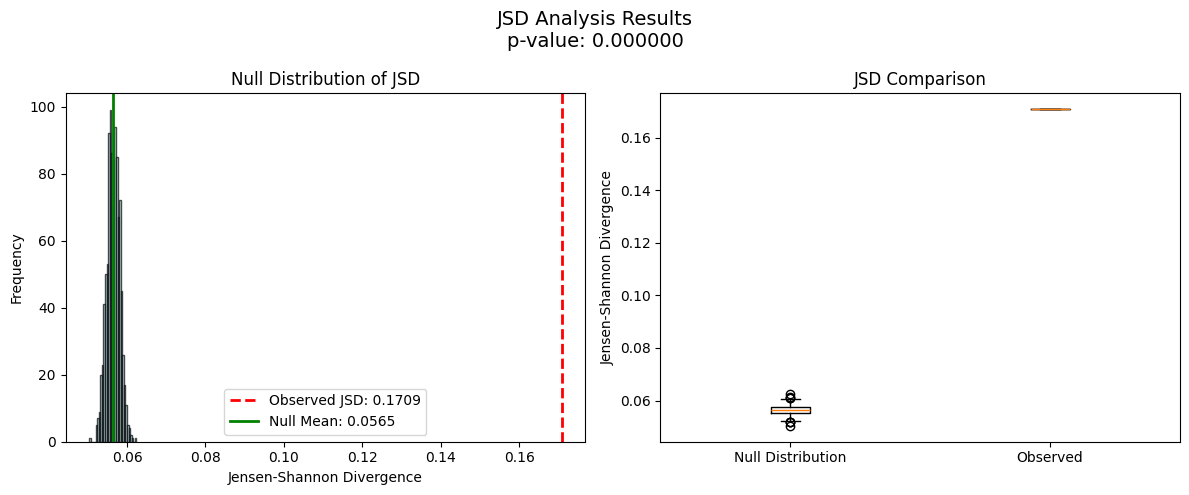


Dictionary 1 Summary:
  Total words: 7493
  Unique words: 1433
  Most frequent: ('you', 329)

Dictionary 2 Summary:
  Total words: 8067
  Unique words: 893
  Most frequent: ('your', 532)

Statistical Analysis:
  Observed JSD: 0.170852
  P-value: 0.000000
  Null distribution mean: 0.056459
  Null distribution std: 0.001629


In [18]:
import math
import numpy as np
# Split each group into words and get word counts
human_words = human_vs_llm_overall_comparison[0].lower().split()
llm_words = human_vs_llm_overall_comparison[1].lower().split()

# Calculate word frequencies for each group
human_word_freq = {}
llm_word_freq = {}

for word in human_words:
    human_word_freq[word] = human_word_freq.get(word, 0) + 1
    
for word in llm_words:
    llm_word_freq[word] = llm_word_freq.get(word, 0) + 1

analyze_your_data(human_word_freq, llm_word_freq, null_method='resample')

In [22]:
import numpy as np
from scipy.spatial.distance import jensenshannon
import random
from collections import defaultdict
import json
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import pandas as pd

def normalize_dict(word_dict):
    """Convert word counts to probabilities (normalize to sum to 1)"""
    total = sum(word_dict.values())
    return {word: count/total for word, count in word_dict.items()}

def dict_to_probability_vector(word_dict, all_words):
    """Convert dictionary to probability vector with consistent word ordering"""
    prob_dict = normalize_dict(word_dict)
    return np.array([prob_dict.get(word, 0) for word in all_words])

def jensen_shannon_divergence(dict1, dict2):
    """Calculate Jensen-Shannon divergence between two word frequency dictionaries"""
    # Get all unique words from both dictionaries
    all_words = sorted(set(dict1.keys()) | set(dict2.keys()))
    
    # Convert to probability vectors
    p1 = dict_to_probability_vector(dict1, all_words)
    p2 = dict_to_probability_vector(dict2, all_words)
    
    # Calculate JSD (scipy's jensenshannon returns the square root of JSD)
    # We square it to get the actual JSD
    jsd = jensenshannon(p1, p2) ** 2
    
    return jsd

def create_pairwise_null_distribution(dict_list, n_permutations=1000, method='shuffle'):
    """
    Create null distribution for all pairwise comparisons between dictionaries
    
    Parameters:
    - dict_list: list of dictionaries [dict1, dict2, dict3, dict4]
    - n_permutations: number of permutations for null distribution
    - method: 'shuffle' or 'resample'
    
    Returns:
    - Dictionary with keys as tuples of indices (i,j) and values as list of JSD values
    """
    # Number of dictionaries
    n_dicts = len(dict_list)
    
    # Create all pairwise combinations
    pairs = list(itertools.combinations(range(n_dicts), 2))
    
    # Initialize results dictionary
    null_distributions = {pair: [] for pair in pairs}
    
    if method == 'shuffle':
        # Combine all words and their total counts
        combined_dict = defaultdict(int)
        for d in dict_list:
            for word, count in d.items():
                combined_dict[word] += count
        
        # Get total counts for each dictionary
        totals = [sum(d.values()) for d in dict_list]
        
        # For each permutation
        for _ in range(n_permutations):
            # Create a list of all word tokens
            all_tokens = []
            for word, count in combined_dict.items():
                all_tokens.extend([word] * count)
            
            # Randomly shuffle all tokens
            random.shuffle(all_tokens)
            
            # Split shuffled tokens into n_dicts groups
            shuffled_dicts = []
            start_idx = 0
            
            for total in totals:
                shuffled_dict = defaultdict(int)
                end_idx = start_idx + total
                
                for word in all_tokens[start_idx:end_idx]:
                    shuffled_dict[word] += 1
                
                shuffled_dicts.append(shuffled_dict)
                start_idx = end_idx
            
            # Calculate JSD for each pair in this permutation
            for (i, j) in pairs:
                jsd = jensen_shannon_divergence(shuffled_dicts[i], shuffled_dicts[j])
                null_distributions[(i, j)].append(jsd)
    
    elif method == 'resample':
        # Combine dictionaries to get overall word probabilities
        combined_dict = defaultdict(int)
        for d in dict_list:
            for word, count in d.items():
                combined_dict[word] += count
        
        # Convert to probabilities
        total_combined = sum(combined_dict.values())
        words = list(combined_dict.keys())
        probs = [combined_dict[word] / total_combined for word in words]
        
        # Get original total counts
        totals = [sum(d.values()) for d in dict_list]
        
        # For each permutation
        for _ in range(n_permutations):
            # Resample words for each dictionary
            shuffled_dicts = []
            
            for total in totals:
                sample = np.random.choice(words, size=total, p=probs)
                
                # Count frequencies
                resampled_dict = defaultdict(int)
                for word in sample:
                    resampled_dict[word] += 1
                
                shuffled_dicts.append(resampled_dict)
            
            # Calculate JSD for each pair in this permutation
            for (i, j) in pairs:
                jsd = jensen_shannon_divergence(shuffled_dicts[i], shuffled_dicts[j])
                null_distributions[(i, j)].append(jsd)
    
    else:
        raise ValueError("method must be 'shuffle' or 'resample'")
    
    return null_distributions

def multi_dict_jsd_analysis(dict_list, names=None, n_permutations=1000, method='shuffle'):
    """
    Complete analysis comparing multiple dictionaries
    
    Parameters:
    - dict_list: list of dictionaries [dict1, dict2, dict3, dict4]
    - names: optional list of names for the dictionaries
    - n_permutations: number of permutations for null distribution
    - method: 'shuffle' or 'resample'
    
    Returns:
    - Dictionary with results
    """
    n_dicts = len(dict_list)
    
    if names is None:
        names = [f"Dict {i+1}" for i in range(n_dicts)]
    
    # Calculate all pairwise observed JSDs
    pairs = list(itertools.combinations(range(n_dicts), 2))
    observed_jsds = {}
    
    for (i, j) in pairs:
        observed_jsds[(i, j)] = jensen_shannon_divergence(dict_list[i], dict_list[j])
    
    # Generate null distributions
    null_distributions = create_pairwise_null_distribution(
        dict_list, n_permutations=n_permutations, method=method
    )
    
    # Calculate p-values and statistics
    results = {
        'names': names,
        'n_dicts': n_dicts,
        'observed_jsds': {},
        'p_values': {},
        'null_means': {},
        'null_stds': {},
        'null_percentiles': {},
        'significant': {},
        'null_distributions': {}
    }
    
    for (i, j) in pairs:
        pair_name = f"{names[i]} vs {names[j]}"
        observed_jsd = observed_jsds[(i, j)]
        null_dist = null_distributions[(i, j)]
        
        # Calculate p-value
        greater_or_equal = sum(1 for null_jsd in null_dist if null_jsd >= observed_jsd)
        p_value = greater_or_equal / len(null_dist)
        
        # Calculate statistics
        null_mean = np.mean(null_dist)
        null_std = np.std(null_dist)
        null_percentiles = np.percentile(null_dist, [5, 25, 50, 75, 95])
        
        # Store results
        results['observed_jsds'][pair_name] = observed_jsd
        results['p_values'][pair_name] = p_value
        results['null_means'][pair_name] = null_mean
        results['null_stds'][pair_name] = null_std
        results['null_percentiles'][pair_name] = {
            '5%': null_percentiles[0],
            '25%': null_percentiles[1],
            '50%': null_percentiles[2],
            '75%': null_percentiles[3],
            '95%': null_percentiles[4]
        }
        results['significant'][pair_name] = p_value < 0.05
        results['null_distributions'][pair_name] = null_dist
    
    return results

def create_jsd_matrix(dict_list, names=None):
    """Create a matrix of pairwise JSD values"""
    n_dicts = len(dict_list)
    
    if names is None:
        names = [f"Dict {i+1}" for i in range(n_dicts)]
    
    # Initialize matrix
    jsd_matrix = np.zeros((n_dicts, n_dicts))
    
    # Calculate all pairwise JSDs
    for i in range(n_dicts):
        for j in range(n_dicts):
            if i != j:
                jsd_matrix[i, j] = jensen_shannon_divergence(dict_list[i], dict_list[j])
    
    return jsd_matrix, names

def visualize_jsd_matrix(jsd_matrix, names, title="Pairwise JSD Matrix"):
    """Visualize the matrix of pairwise JSD values"""
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(jsd_matrix, dtype=bool))
    
    # Use a custom diverging colormap
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
    
    # Draw the heatmap
    sns.heatmap(jsd_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},
                annot=True, fmt=".3f", xticklabels=names, yticklabels=names)
    
    plt.title(title)
    plt.tight_layout()
    return plt.gcf()

def visualize_multi_results(results, title="Multiple Dictionary JSD Analysis"):
    """Create visualizations for multi-dictionary JSD analysis"""
    n_pairs = len(results['observed_jsds'])
    n_cols = min(3, n_pairs)
    n_rows = (n_pairs + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    
    if n_pairs == 1:
        axes = np.array([axes])
    
    axes = axes.flatten()
    
    for i, (pair_name, observed_jsd) in enumerate(results['observed_jsds'].items()):
        if i < len(axes):
            ax = axes[i]
            null_dist = results['null_distributions'][pair_name]
            
            # Histogram
            ax.hist(null_dist, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
            ax.axvline(observed_jsd, color='red', linestyle='--', linewidth=2, 
                       label=f'Observed: {observed_jsd:.4f}')
            ax.axvline(results['null_means'][pair_name], color='green', linestyle='-', linewidth=2,
                          label=f'Null Mean: {results["null_means"][pair_name]:.4f}')
            
            # Add p-value and significance
            p_value = results['p_values'][pair_name]
            if p_value < 0.001:
                significance = "p < 0.001 ***"
            elif p_value < 0.01:
                significance = f"p = {p_value:.4f} **"
            elif p_value < 0.05:
                significance = f"p = {p_value:.4f} *"
            else:
                significance = f"p = {p_value:.4f} (n.s.)"
            
            ax.set_title(f"{pair_name}\n{significance}")
            ax.set_xlabel('Jensen-Shannon Divergence')
            ax.set_ylabel('Frequency')
            ax.legend()
    
    # Hide any unused subplots
    for i in range(n_pairs, len(axes)):
        fig.delaxes(axes[i])
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    return fig

def create_multi_summary_report(dict_list, results, names=None):
    """Create a summary report for multi-dictionary analysis"""
    n_dicts = len(dict_list)
    
    if names is None:
        names = [f"Dict {i+1}" for i in range(n_dicts)]
    
    print("="*80)
    print("MULTIPLE DICTIONARY WORD FREQUENCY DISTRIBUTION COMPARISON REPORT")
    print("="*80)
    
    # Summary of dictionaries
    for i, d in enumerate(dict_list):
        print(f"\n{names[i]} Summary:")
        print(f"  Total words: {sum(d.values())}")
        print(f"  Unique words: {len(d)}")
        try:
            print(f"  Most frequent: {max(d.items(), key=lambda x: x[1])}")
        except ValueError:
            print("  No words found")
    
    # Pairwise comparisons
    print("\nPairwise Comparisons:")
    for pair_name in results['observed_jsds']:
        observed_jsd = results['observed_jsds'][pair_name]
        p_value = results['p_values'][pair_name]
        
     #    # Format significance markers
     #    if p_value < 0.001:
     #        significance = "***"
     #    elif p_value < 0.01:
     #        significance = "**"
     #    elif p_value < 0.05:
     #        significance = "*"
     #    else:
     #        significance = "n.s."
        
        print(f"  {pair_name}:")
        print(f"    - JSD: {observed_jsd:.6f}")
        print(f"    - p-value: {p_value:.6f}")
     #    print(f"    - p-value: {p_value:.6f} {significance}")
    
    # Overall summary
    print("\nOverall Summary:")
    # Find most similar pair
    most_similar_pair = min(results['observed_jsds'].items(), key=lambda x: x[1])
    # Find most different pair
    most_different_pair = max(results['observed_jsds'].items(), key=lambda x: x[1])
    
    print(f"  Most similar pair: {most_similar_pair[0]} (JSD: {most_similar_pair[1]:.6f})")
    print(f"  Most different pair: {most_different_pair[0]} (JSD: {most_different_pair[1]:.6f})")
    
    # Count significant differences
    sig_count = sum(1 for is_sig in results['significant'].values() if is_sig)
    total_pairs = len(results['significant'])
    
    print(f"  Significant differences: {sig_count} out of {total_pairs} pairs")
    
    print("="*80)




In [23]:
import math
import numpy as np
# Split each group into words and get word counts
both_goal_all_responses_word_list = all_raw_responses_comparison_by_goals_list[0].lower().split()
default_goal_all_responses_word_list = all_raw_responses_comparison_by_goals_list[1].lower().split()
informative_goal_all_responses_word_list = all_raw_responses_comparison_by_goals_list[2].lower().split()
social_goal_all_responses_word_list = all_raw_responses_comparison_by_goals_list[3].lower().split()

# Calculate word frequencies for each group
both_goal_all_responses_freq = {}
default_goal_all_responses_freq = {}
informative_goal_all_responses_freq = {}
social_goal_all_responses_freq = {}

for word in both_goal_all_responses_word_list:
    both_goal_all_responses_freq[word] = both_goal_all_responses_freq.get(word, 0) + 1
    
for word in default_goal_all_responses_word_list:
    default_goal_all_responses_freq[word] = default_goal_all_responses_freq.get(word, 0) + 1

for word in informative_goal_all_responses_word_list:
    informative_goal_all_responses_freq[word] = informative_goal_all_responses_freq.get(word, 0) + 1

for word in social_goal_all_responses_word_list:
    social_goal_all_responses_freq[word] = social_goal_all_responses_freq.get(word, 0) + 1

MULTIPLE DICTIONARY WORD FREQUENCY DISTRIBUTION COMPARISON REPORT

both-goal Summary:
  Total words: 5356
  Unique words: 1020
  Most frequent: ('your', 234)

default-goal Summary:
  Total words: 3336
  Unique words: 675
  Most frequent: ('i', 172)

informative-goal Summary:
  Total words: 4243
  Unique words: 855
  Most frequent: ('your', 180)

social-goal Summary:
  Total words: 2625
  Unique words: 547
  Most frequent: ('was', 150)

Pairwise Comparisons:
  both-goal vs default-goal:
    - JSD: 0.136361
    - p-value: 0.000000
  both-goal vs informative-goal:
    - JSD: 0.134416
    - p-value: 0.000000
  both-goal vs social-goal:
    - JSD: 0.195125
    - p-value: 0.000000
  default-goal vs informative-goal:
    - JSD: 0.134298
    - p-value: 0.000000
  default-goal vs social-goal:
    - JSD: 0.166115
    - p-value: 0.000000
  informative-goal vs social-goal:
    - JSD: 0.230704
    - p-value: 0.000000

Overall Summary:
  Most similar pair: default-goal vs informative-goal (JSD: 0.13

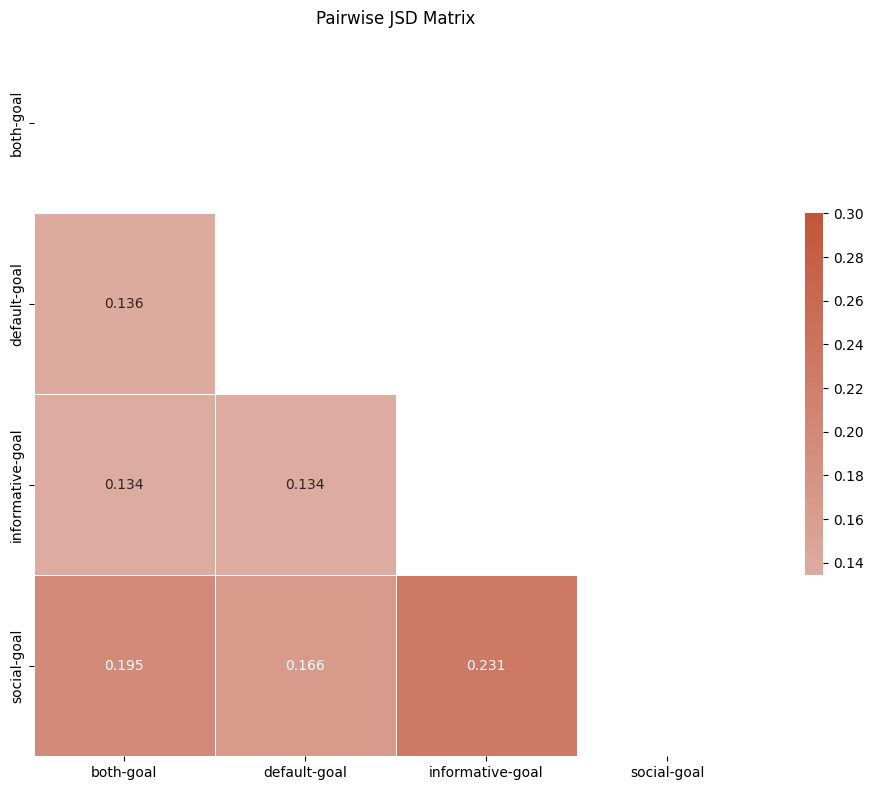

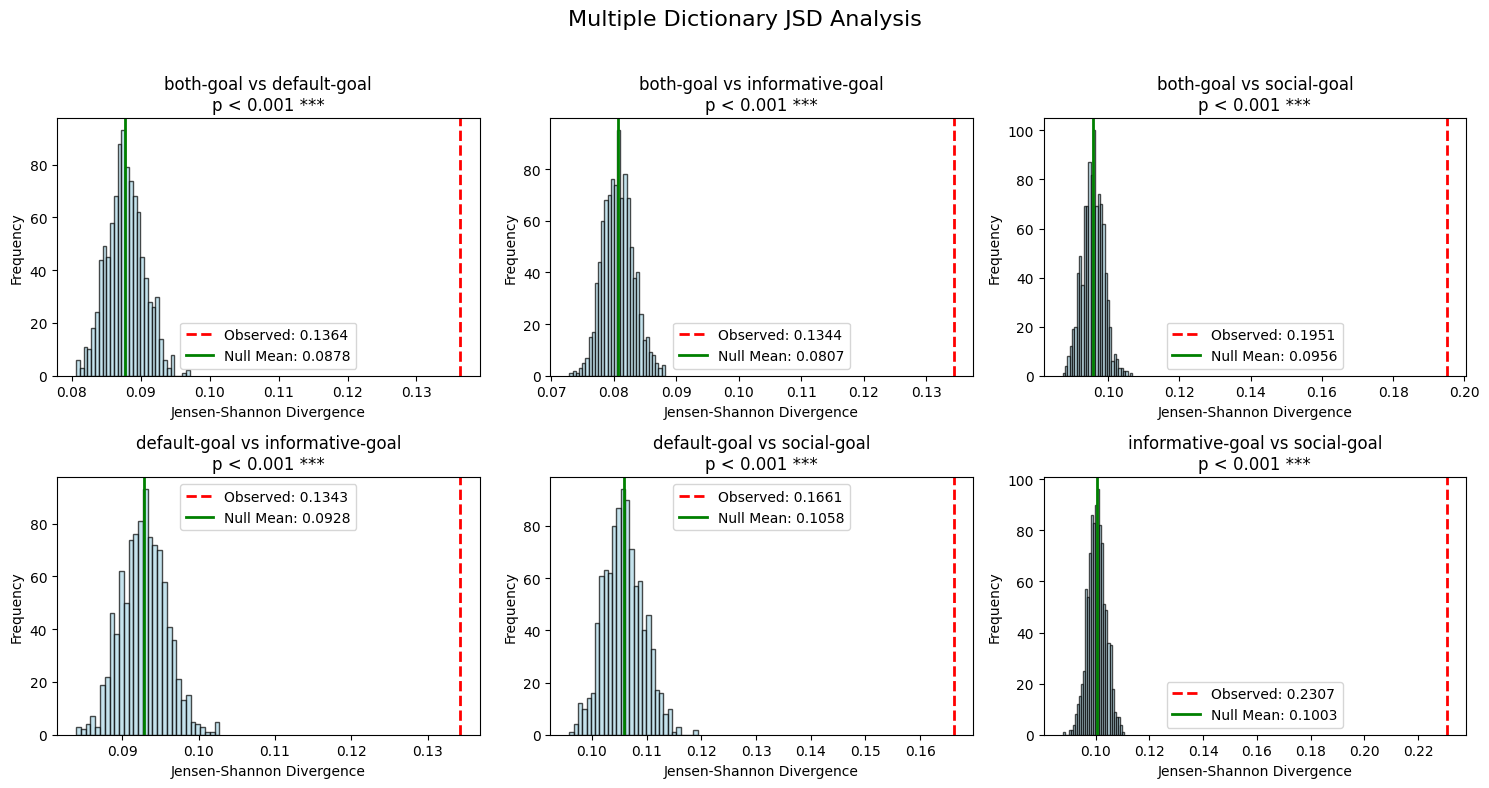

In [24]:


# Names for the dictionaries
names = ["both-goal", "default-goal", "informative-goal", "social-goal"]

# Create list of dictionaries
dict_list = [both_goal_all_responses_freq, default_goal_all_responses_freq,
             informative_goal_all_responses_freq, social_goal_all_responses_freq]

# Run the analysis
results = multi_dict_jsd_analysis(dict_list, names=names, n_permutations=1000, method = "resample")

# Generate report
create_multi_summary_report(dict_list, results, names=names)

# Create and save visualizations
jsd_matrix, matrix_names = create_jsd_matrix(dict_list, names=names)
matrix_fig = visualize_jsd_matrix(jsd_matrix, matrix_names)
#     matrix_fig.savefig("jsd_matrix.png")

results_fig = visualize_multi_results(results)
#     results_fig.savefig("multi_jsd_analysis.png")

print("Analysis complete! Visualizations and results have been saved.")